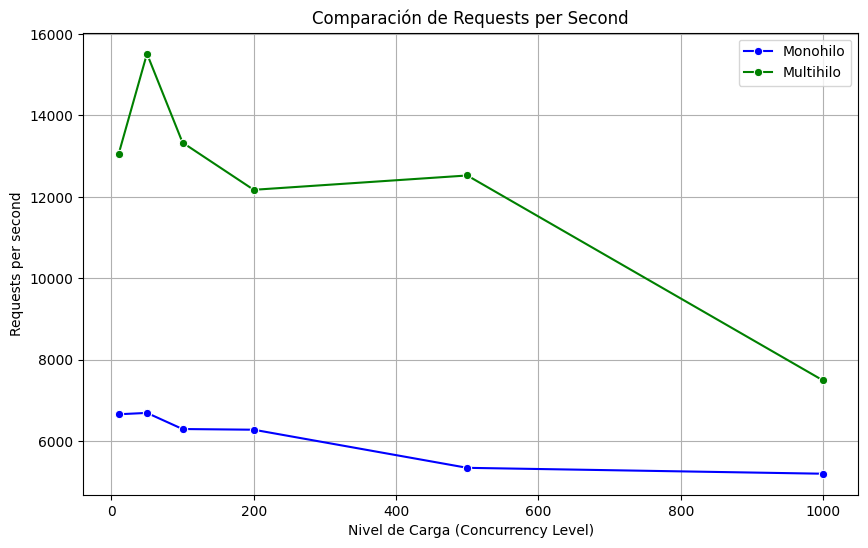

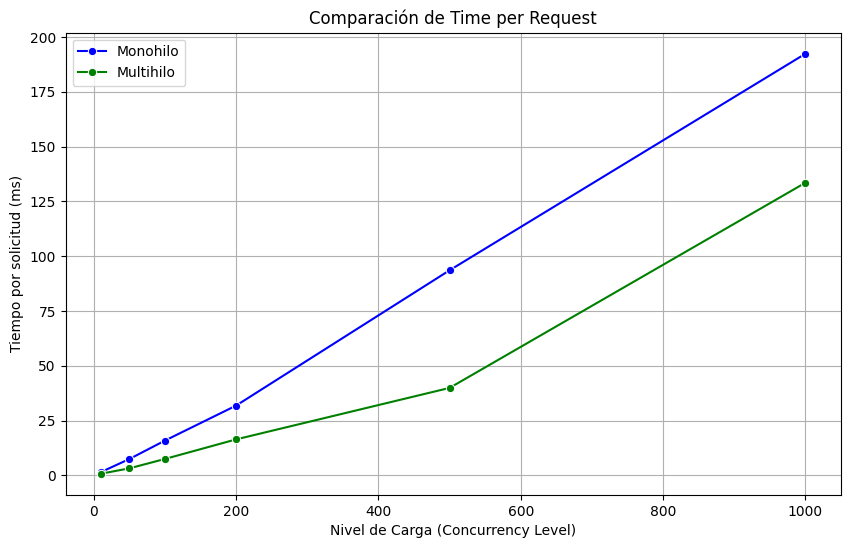

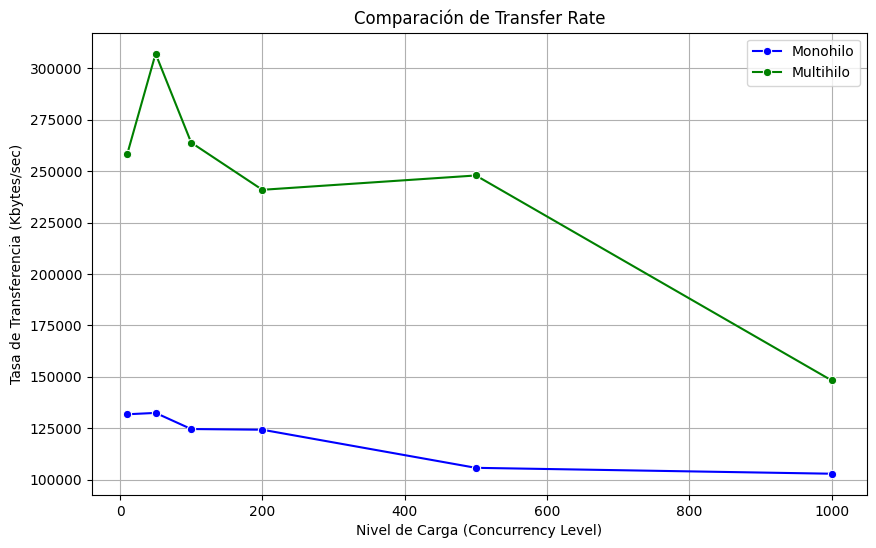

ANOVA - Requests per second: F_onewayResult(statistic=np.float64(31.626248898117286), pvalue=np.float64(0.0002203193563495177))
ANOVA - Time per request (ms): F_onewayResult(statistic=np.float64(0.4105932871242436), pvalue=np.float64(0.5360756300839009))
ANOVA - Transfer rate (Kbytes/sec): F_onewayResult(statistic=np.float64(31.629415084680918), pvalue=np.float64(0.00022023346260797633))


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Datos para el servidor monohilo
data_monohilo = {
    "Concurrency Level": [10, 50, 100, 200, 500, 1000],
    "Requests per second": [6659.34, 6692.99, 6296.75, 6279.91, 5343.54, 5198.78],
    "Time per request (ms)": [1.502, 7.470, 15.881, 31.848, 93.571, 192.353],
    "Transfer rate (Kbytes/sec)": [131808.14, 132474.19, 124631.44, 124298.02, 105764.44, 102899.19]
}

# Datos para el servidor multihilo
data_multihilo = {
    "Concurrency Level": [10, 50, 100, 200, 500, 1000],
    "Requests per second": [13042.40, 15517.59, 13334.04, 12174.19, 12526.31, 7490.19],
    "Time per request (ms)": [0.767, 3.222, 7.5, 16.428, 39.916, 133.508],
    "Transfer rate (Kbytes/sec)": [258160.57, 307154.31, 263933.35, 240975.22, 247945.00, 148260.37]
}

# Convertir a DataFrame
df_monohilo = pd.DataFrame(data_monohilo)
df_multihilo = pd.DataFrame(data_multihilo)

# Graficar comparación: Requests per second
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Requests per second", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Requests per second", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Requests per Second")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Requests per second")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Time per request
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Time per request (ms)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Time per request (ms)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Time per Request")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Tiempo por solicitud (ms)")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Transfer rate
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Transfer rate (Kbytes/sec)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Transfer rate (Kbytes/sec)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Transfer Rate")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Tasa de Transferencia (Kbytes/sec)")
plt.legend()
plt.grid()
plt.show()

# Análisis estadístico: ANOVA para comparar los dos servidores
anova_requests = stats.f_oneway(df_monohilo["Requests per second"], df_multihilo["Requests per second"])
anova_time = stats.f_oneway(df_monohilo["Time per request (ms)"], df_multihilo["Time per request (ms)"])
anova_transfer = stats.f_oneway(df_monohilo["Transfer rate (Kbytes/sec)"], df_multihilo["Transfer rate (Kbytes/sec)"])

# Mostrar resultados ANOVA
print("ANOVA - Requests per second:", anova_requests)
print("ANOVA - Time per request (ms):", anova_time)
print("ANOVA - Transfer rate (Kbytes/sec):", anova_transfer)
